In [214]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.stats import laplace
from scipy.optimize import fsolve
import scipy.integrate as integrate
from matplotlib.collections import LineCollection
import seaborn as sns

In [215]:
def Pareto_optimal(U_C,R):
    """
    Input: "U_C" is a list of conference quality;
           "R" is a list of review burden with equal length of "U_C";
           The i'th entry of both vectors result in a point on the QB-tradeoff.
    Output: the Pareto optimal points on the input points on the QB-tradeoff.
    """
    U_C = np.round(np.array(U_C),4)
    R = np.round(np.array(R),4)
    left = []
    length = len(U_C)
    for i in range(length):
        if R[i] == 0:
            continue
        flag = 0
        for j in range(length):
            if j != i:
                if (U_C[i] < U_C[j] and R[i] >= R[j]) or (U_C[i] <= U_C[j] and R[i] > R[j]):
                    flag = 1
                    break
        if flag == 0:
            left.append(i)
    return U_C[np.array(left)], R[np.array(left)], np.array(left)


# 1. The QB-tradeoff

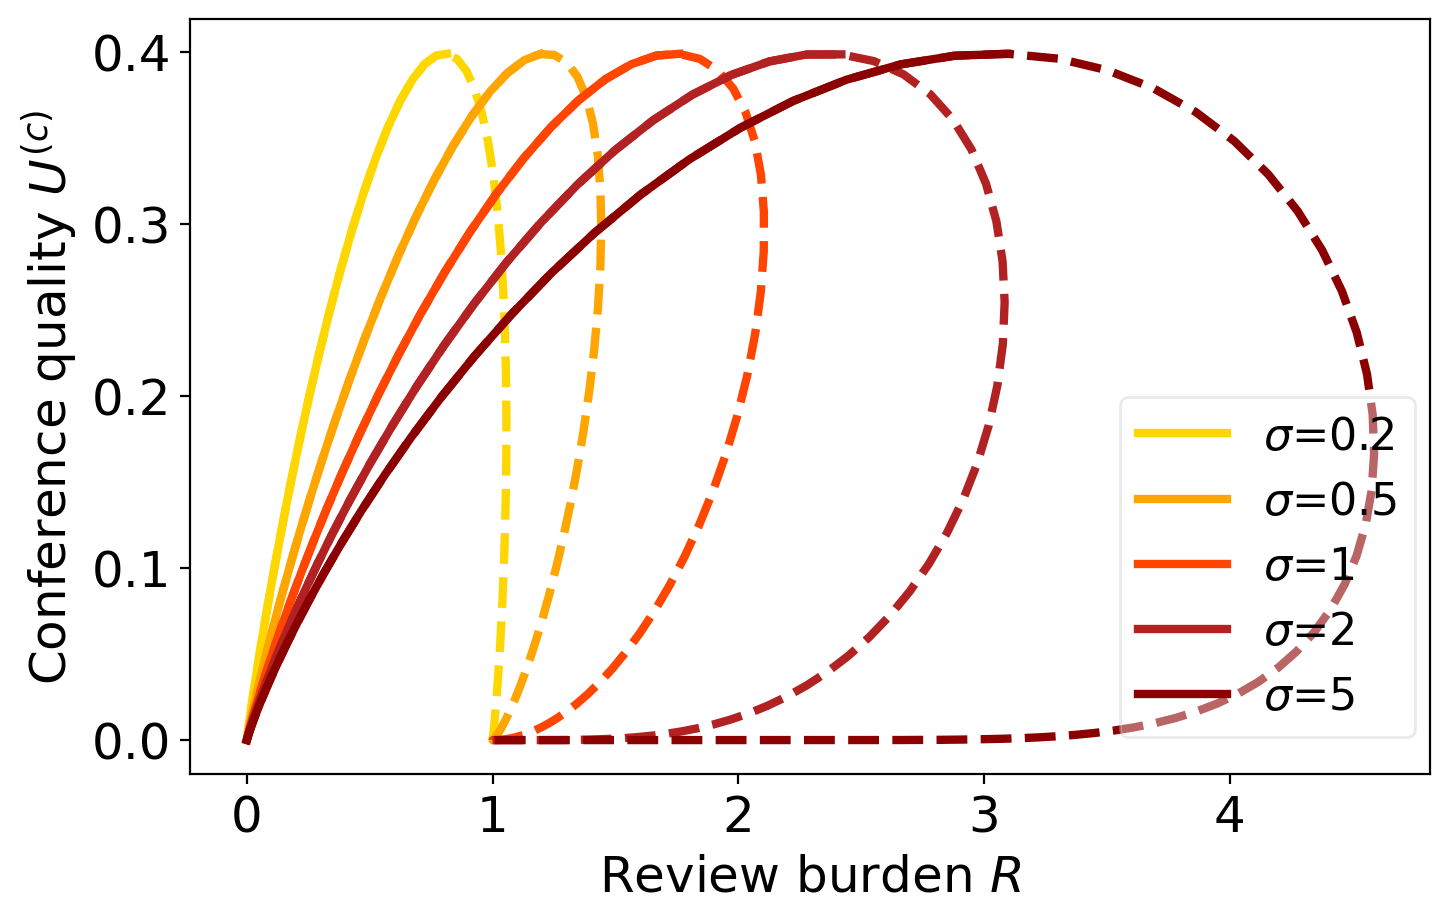

In [177]:
"""
Example 1
"""

V = 3 # conference value
eta = 0.7 # discount factor
tau_range = np.arange(-12,12,0.1) # the acceptance thresholds

def F_R(x): # The cdf of the review noise 
    return norm.cdf(x, 0, sigma)

# Quality distribution
sigma_Q = 1# std
mu_Q = 0 # mean
def f_Q(Q): # pdf of the quality distribution
    return norm.pdf(Q, mu_Q, sigma_Q)

plt.figure(figsize=(8,5), dpi= 200)
colors = ['gold','orange','orangered','firebrick','darkred']
for i,sigma in enumerate([0.2, 0.5, 1, 2, 5]):
    U_c = []
    R = []
    for tau in tau_range: # Vary the acceptance threshold
        f = lambda x: F_R(x) - (V-1)/(V-eta)
        gap = fsolve(f, 0)[0] # Solve for the resubmission gap
        theta = tau - gap # Compute the de facto threshold
        def n_round(q): 
            # Given a paper quality q, return the expected number of rounds the paper is submitted until accepted
            return f_Q(q)/(1-F_R(tau - q))
        result = integrate.quad(lambda x: n_round(x), theta, np.infty)[0]
        R.append(result)
        result = integrate.quad(lambda x: x*f_Q(x), theta, np.infty)[0]
        U_c.append(result)
    U_c = np.array(U_c)
    R = np.array(R)
    U_po, R_po,index = Pareto_optimal(U_c, R)
    plt.plot(R_po, U_po, label = r'$\sigma$='+str(sigma), color = colors[i], linewidth = 3)
    plt.plot(np.array(R), np.array(U_c), linestyle = '--', color = colors[i], linewidth = 3)
plt.legend(fontsize=16, loc = (0.75,0.05),framealpha = 0.4)
plt.xlabel(r'Review burden $R$', fontsize=18)
plt.ylabel(r'Conference quality $U^{(c)}$', fontsize=18)
plt.tick_params(labelsize=18)

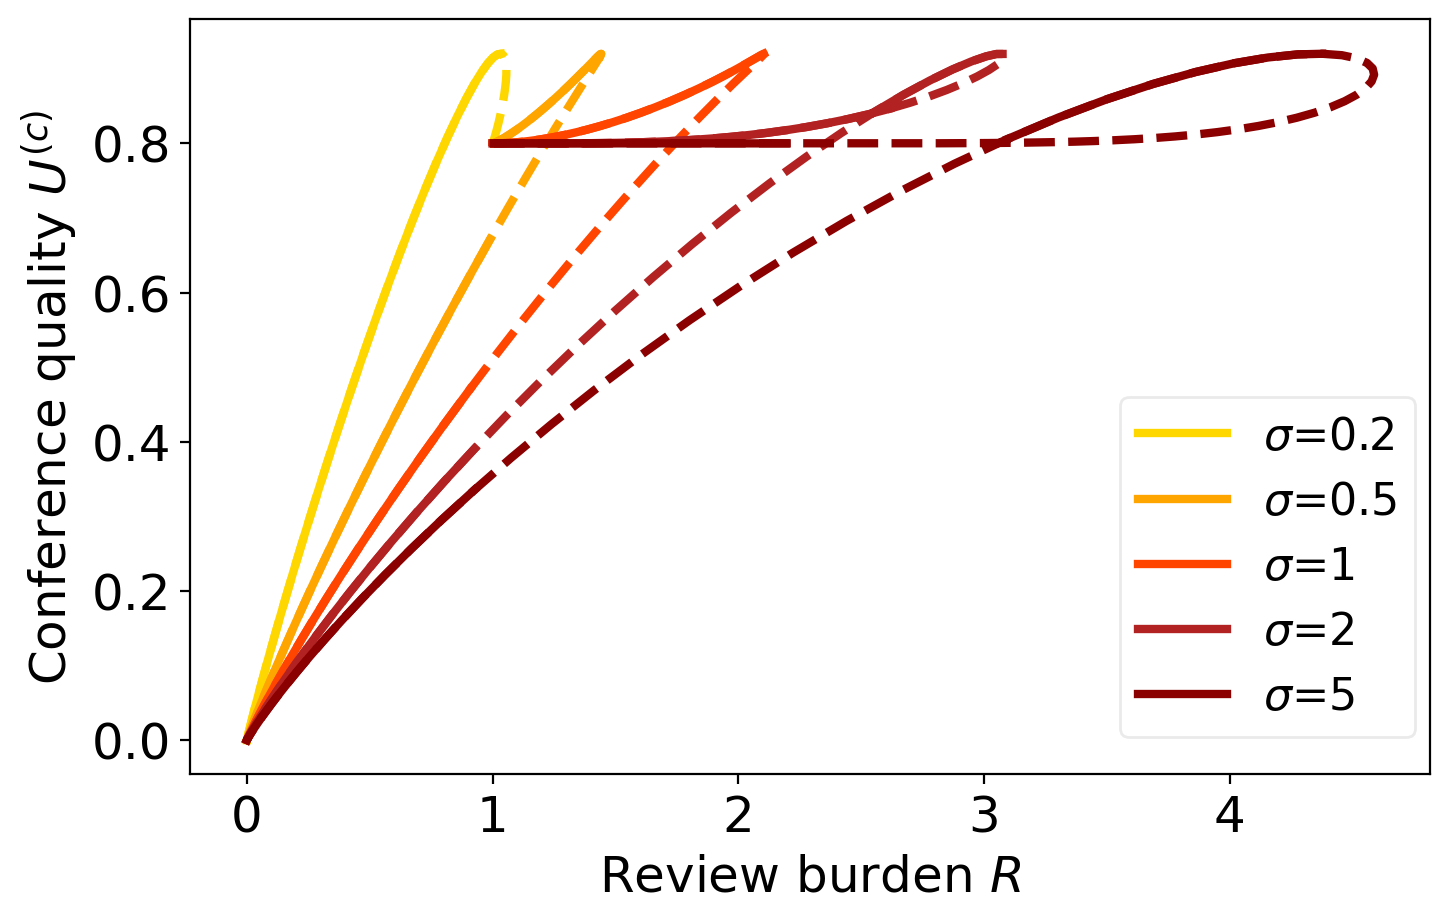

In [173]:
"""
Example 2
"""
V = 3 # conference value
eta = 0.7 # discount factor
tau_range = np.arange(-12,12,0.1) # the acceptance thresholds

def F_R(x): # The cdf of the review noise 
    return norm.cdf(x, 0, sigma)

# Quality distribution
sigma_Q = 1# std
mu_Q = 0.8 # mean
def f_Q(Q): # pdf of the quality distribution
    return norm.pdf(Q, mu_Q, sigma_Q)

plt.figure(figsize=(8,5), dpi= 200)
colors = ['gold','orange','orangered','firebrick','darkred']
for i,sigma in enumerate([0.2, 0.5, 1, 2, 5]):
    U_c = []
    R = []
    for tau in tau_range: # Vary the acceptance threshold
        f = lambda x: F_R(x) - (V-1)/(V-eta)
        gap = fsolve(f, 0)[0] # Solve for the resubmission gap
        theta = tau - gap # Compute the de facto threshold
        def n_round(q): 
            # Given a paper quality q, return the expected number of rounds the paper is submitted until accepted
            return f_Q(q)/(1-F_R(tau - q))
        result = integrate.quad(lambda x: n_round(x), theta, np.infty)[0]
        R.append(result)
        result = integrate.quad(lambda x: x*f_Q(x), theta, np.infty)[0]
        U_c.append(result)
    U_c = np.array(U_c)
    R = np.array(R)
    U_po, R_po,index = Pareto_optimal(U_c, R)
    if i == 0:
        plt.plot(R[122:], U_c[122:], label = r'$\sigma$='+str(sigma), color = colors[i], linewidth = 3)
        plt.plot(R, U_c, linestyle = '--', color = colors[i], linewidth = 3)
    elif i == 1:
        index1 = index[index<128]
        index2 = index[np.where(index>128)[0]]
        plt.plot(R[index1], U_c[index1], label = r'$\sigma$='+str(sigma), color = colors[i], linewidth = 3)
        plt.plot(R[index2], U_c[index2], color = colors[i], linewidth = 3)
        plt.plot(R, U_c, linestyle = '--', color = colors[i], linewidth = 3)
    elif i == 2:
        index1 = index[index<140]
        index2 = index[np.where(index>140)[0]]
        plt.plot(R[index1], U_c[index1], label = r'$\sigma$='+str(sigma), color = colors[i], linewidth = 3)
        plt.plot(R[index2], U_c[index2], color = colors[i], linewidth = 3)
        plt.plot(R, U_c, linestyle = '--', color = colors[i], linewidth = 3)
    elif i == 3:
        index1 = index[index<140]
        index2 = index[np.where(index>140)[0]]
        index2 = index2[index2<155]
        index3 = index[index>155]
        plt.plot(R[index1], U_c[index1], label = r'$\sigma$='+str(sigma), color = colors[i], linewidth = 3)
        plt.plot(R[index2], U_c[index2], color = colors[i], linewidth = 3)
        plt.plot(R[index3], U_c[index3], color = colors[i], linewidth = 3)
        plt.plot(R, U_c, linestyle = '--', color = colors[i], linewidth = 3)
    elif i == 4:
        index2 = index[np.where(index>155)[0]]
        index2 = index2[index2<190]
        index3 = index[index>190]
        plt.plot(R[index1], U_c[index1], label = r'$\sigma$='+str(sigma), color = colors[i], linewidth = 3)
        plt.plot(R[index2], U_c[index2], color = colors[i], linewidth = 3)
        plt.plot(R[index3], U_c[index3], color = colors[i], linewidth = 3)
        plt.plot(R, U_c, linestyle = '--', color = colors[i], linewidth = 3)
plt.legend(fontsize=16, loc = (0.75,0.05),framealpha = 0.4)
plt.xlabel(r'Review burden $R$', fontsize=18)
plt.ylabel(r'Conference quality $U^{(c)}$', fontsize=18)
plt.tick_params(labelsize=18)

# 2. Acceptance Rate

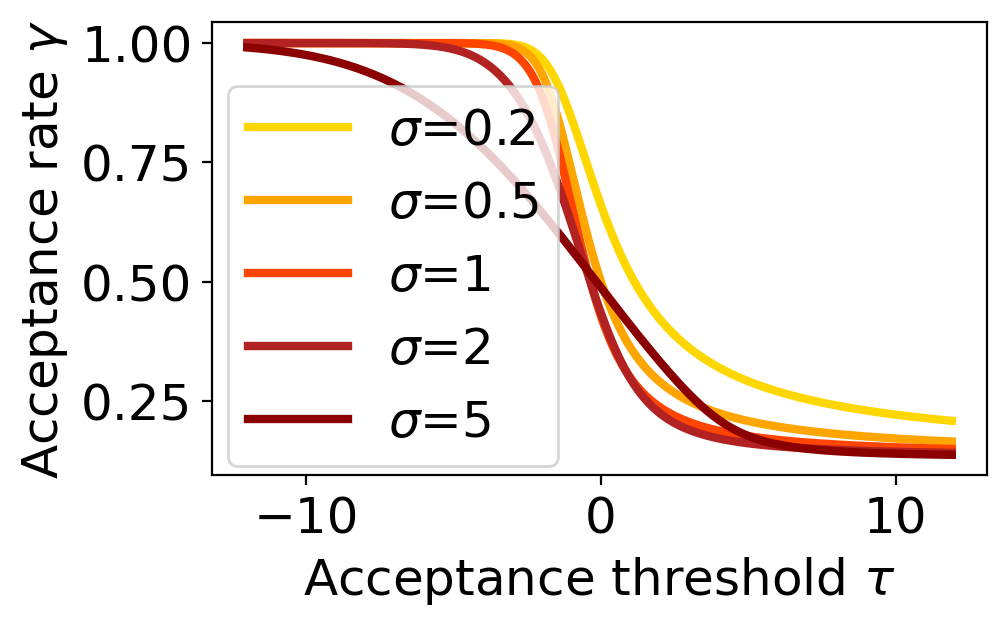

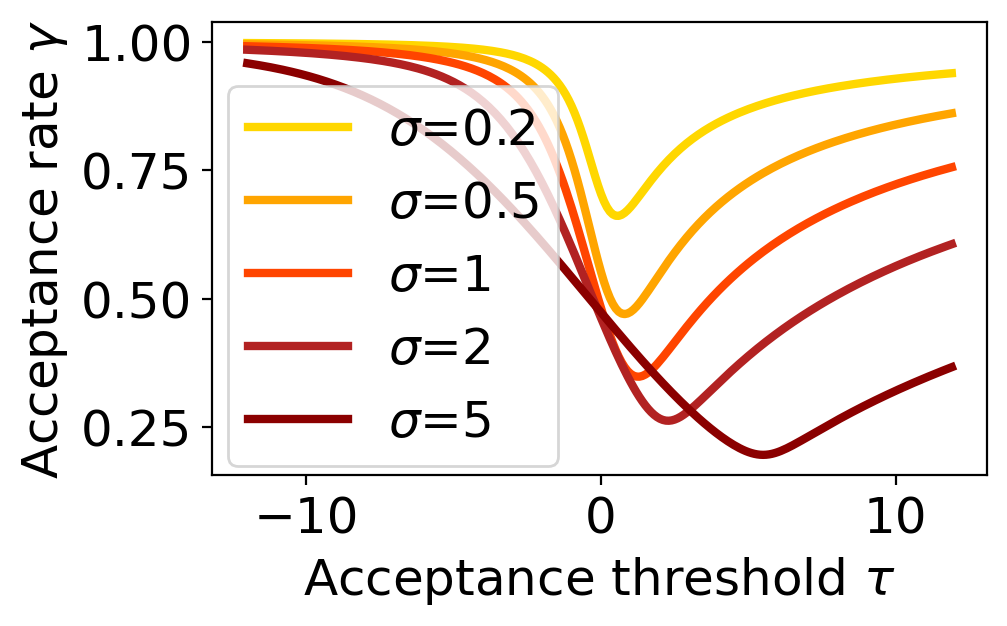

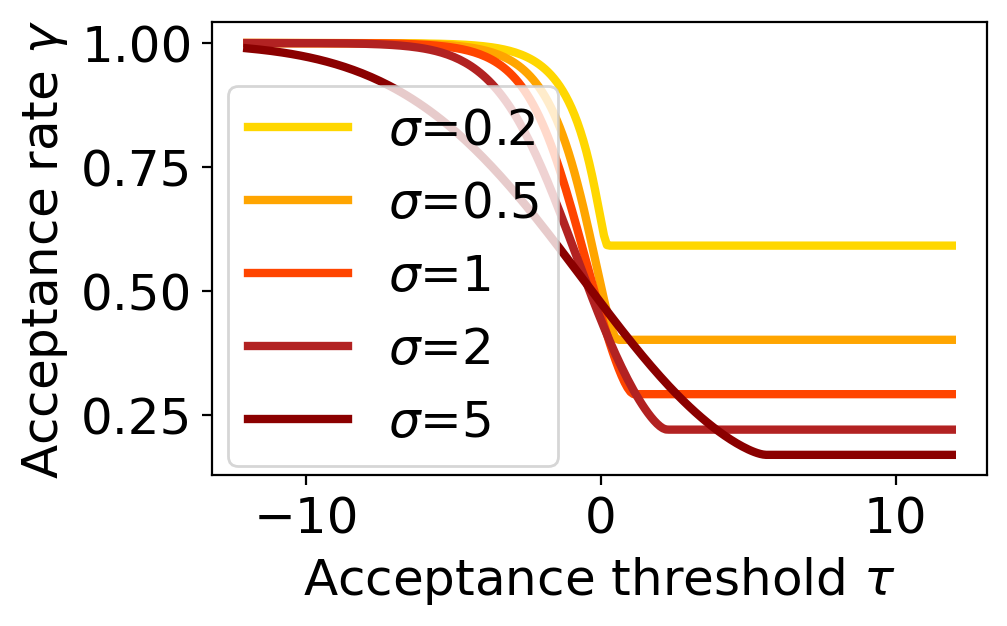

In [189]:
V = 3 # conference value
eta = 0.7 # discount factor
tau_range = np.arange(-12,12,0.1) # the acceptance thresholds
colors = ['gold','orange','orangered','firebrick','darkred']

def F_R(x): # The cdf of the review noise 
    return norm.cdf(x, 0, sigma)


# Quality distribution is Gaussian
plt.figure(figsize=(5,3), dpi= 200)
sigma_Q = 1 # std
mu_Q = 0 # mean
def f_Q(Q): # pdf of the quality distribution
    return norm.pdf(Q, mu_Q, sigma_Q)


for i,sigma in enumerate([0.2, 0.5, 1, 2, 5]):
    Acc_rate = []
    for tau in tau_range:
        f = lambda x: F_R(x) - (V-1)/(V-eta)
        gap = fsolve(f, 0)[0] # Solve for the resubmission gap
        theta = tau - gap # Compute the de facto threshold
        def n_round(q): 
            # Given a paper quality q, return the expected number of rounds the paper is submitted until accepted
            return f_Q(q)/(1-F_R(tau - q))
        denominator = integrate.quad(lambda x: n_round(x), theta, np.infty)[0] # the expected number of papers that are sbumitted each round
        numerator = integrate.quad(lambda x: f_Q(x), theta, np.infty)[0] # the expected number of papers that are accepted each round
        Acc_rate.append(numerator/denominator)

    plt.plot(tau_range, Acc_rate, linewidth = 3, color = colors[i], label = r'$\sigma$='+str(sigma))
plt.tick_params(labelsize=18)
plt.xlabel(r'Acceptance threshold $\tau$', fontsize=18)
plt.ylabel(r'Acceptance rate $\gamma$', fontsize=18)
plt.legend(fontsize=18,loc=(0.02,0.02))

# Quality distribution Cauchy
plt.figure(figsize=(5,3), dpi= 200)
gamma_Q = 1
mu_Q = 0
def f_Q(Q):
    return cauchy.pdf(Q, mu_Q, gamma_Q)
    
for i,sigma in enumerate([0.2, 0.5, 1, 2, 5]):
    Acc_rate = []
    for tau in tau_range:
        f = lambda x: F_R(x) - (V-1)/(V-eta)
        gap = fsolve(f, 0)[0] # Solve for the resubmission gap
        theta = tau - gap # Compute the de facto threshold
        def n_round(q): 
            # Given a paper quality q, return the expected number of rounds the paper is submitted until accepted
            return f_Q(q)/(1-F_R(tau - q))
        denominator = integrate.quad(lambda x: n_round(x), theta, np.infty)[0] # the expected number of papers that are sbumitted each round
        numerator = integrate.quad(lambda x: f_Q(x), theta, np.infty)[0] # the expected number of papers that are accepted each round
        Acc_rate.append(numerator/denominator)

    plt.plot(tau_range, Acc_rate, linewidth = 3, color = colors[i], label = r'$\sigma$='+str(sigma))
plt.tick_params(labelsize=18)
plt.xlabel(r'Acceptance threshold $\tau$', fontsize=18)
plt.ylabel(r'Acceptance rate $\gamma$', fontsize=18)
plt.legend(fontsize=18,loc=(0.02,0.02))
    

# Quality distribution is Laplace
plt.figure(figsize=(5,3), dpi= 200)
gamma_Q = 1
mu_Q = 0
def f_Q(Q):
    return laplace.pdf(Q, mu_Q, gamma_Q)

for i,sigma in enumerate([0.2, 0.5, 1, 2, 5]):
    Acc_rate = []
    for tau in tau_range:
        f = lambda x: F_R(x) - (V-1)/(V-eta)
        gap = fsolve(f, 0)[0] # Solve for the resubmission gap
        theta = tau - gap # Compute the de facto threshold
        def n_round(q): 
            # Given a paper quality q, return the expected number of rounds the paper is submitted until accepted
            return f_Q(q)/(1-F_R(tau - q))
        denominator = integrate.quad(lambda x: n_round(x), theta, np.infty)[0] # the expected number of papers that are sbumitted each round
        numerator = integrate.quad(lambda x: f_Q(x), theta, np.infty)[0] # the expected number of papers that are accepted each round
        Acc_rate.append(numerator/denominator)

    plt.plot(tau_range, Acc_rate, linewidth = 3, color = colors[i], label = r'$\sigma$='+str(sigma))
plt.tick_params(labelsize=18)
plt.xlabel(r'Acceptance threshold $\tau$', fontsize=18)
plt.ylabel(r'Acceptance rate $\gamma$', fontsize=18)
plt.legend(fontsize=18,loc=(0.02,0.02))


# 3. The Optimal Number of Solicited Reviews

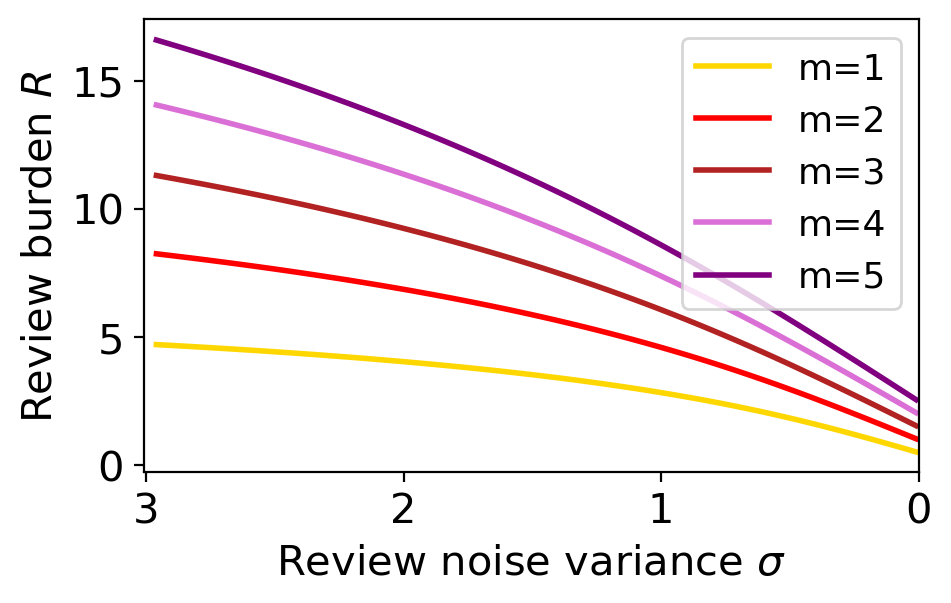

In [192]:
"""
Review burden vs lambda for different m
"""
colors = ['gold','red','firebrick','orchid','purple']
V = 5
eta = 0.7
sig_range = np.arange(0.01,3,0.05) # original review quality

def F_R(x): # The cdf of the review noise 
    return norm.cdf(x, 0, sigma)

### Quality distribution
sigma_Q = 1
mu_Q = 0
def f_Q(Q):
    return norm.pdf(Q, mu_Q, sigma_Q)

plt.figure(figsize=(5,3), dpi= 200)
for m in [1,2,3,4,5]:
    R = []
    for i,sig in enumerate(sig_range):
        sigma = sig/np.sqrt(m) # The aggregated standard deviation
        f = lambda x: F_R(x) - (V-1)/(V-eta)
        tau = fsolve(f, 0)[0] # solve for the optimal acceptance threshold
        def n_round(q): 
            # Given a paper quality q, return the expected number of rounds the paper is submitted until accepted
            return f_Q(q)/(1-F_R(tau - q))
        result = integrate.quad(lambda x: n_round(x), 0, np.infty)[0]
        R.append(m*result)
    plt.plot(sig_range, R, color = Colors[m-1], linewidth = 2, label = 'm='+str(m))
plt.legend(fontsize=13)
plt.xlim(3.01, 0)
plt.xlabel(r'Review noise variance $\sigma$', fontsize=15)
plt.ylabel(r'Review burden $R$', fontsize=15)
plt.tick_params(labelsize=15)

In [213]:
"""
In addition to the previous figure, we further vary the conference value, V.
----------
This takes about 10 min to run
"""

V_range = np.arange(1.5, 30.5, 0.2)
eta = 0.7
sig_range = np.arange(0.1,3,0.05) # Review quality range
opt_R = np.zeros((len(V_range),len(sig_range)))
opt_m = np.zeros((len(V_range),len(sig_range)))

def F_R(x): # The cdf of the review noise 
    return norm.cdf(x, 0, sigma)

### Quality distribution
sigma_Q = 1
mu_Q = 0
def f_Q(Q):
    return norm.pdf(Q, mu_Q, sigma_Q)

for j,sig in enumerate(sig_range):
    for i,V in enumerate(V_range):
        R = [] # the minimum review burden for each of the m
        for m in [1,2,3,4,5]:
            sigma = sig/np.sqrt(m)
            def F_R(x):
                return norm.cdf(x, 0, sigma)
            f = lambda x: F_R(x) - (V-1)/(V-eta)
            tau = fsolve(f, 0)[0]
            def n_round(q): 
                # Given a paper quality q, return the expected number of rounds the paper is submitted until accepted
                return f_Q(q)/(1-F_R(tau - q))
            result = integrate.quad(lambda x: n_review_Q(x), 0, np.infty)[0]
            R.append(m*result)
        opt_m[-i-1,j] = np.argmin(R) + 1
        opt_R[-i-1,j] = np.min(R)
        

Text(41.44444444444443, 0.5, 'Conference value $V$')

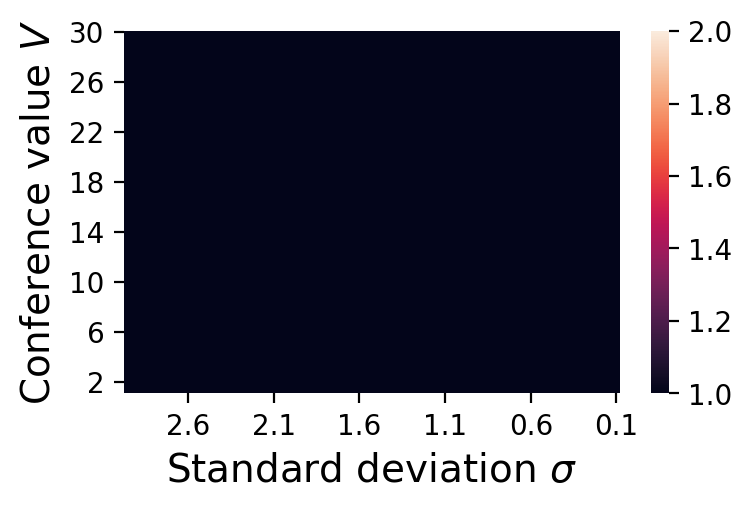

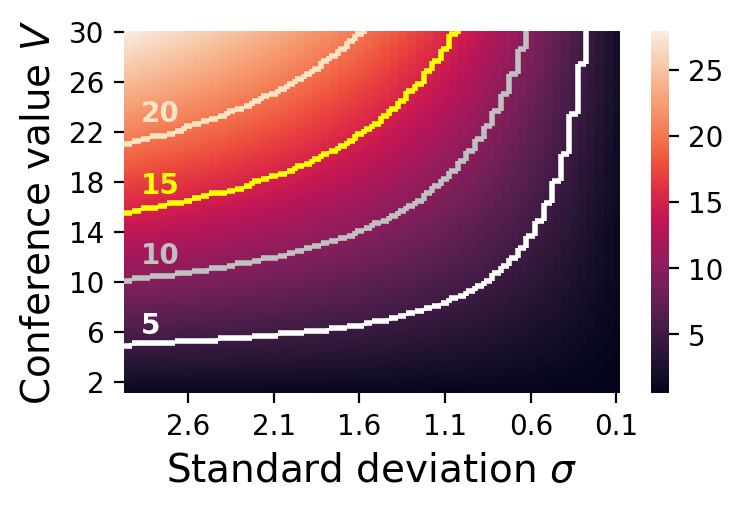

In [198]:
Colors = ['gold','orange','firebrick','darkred']

def add_iso_line(fig, value, color):
    """
    Input: "fig" is the figure to plot contours;
           "value" is the value of the contour;
           "color" indicates the name of the color of the contour.
    The function will draw the countour on the input figure
    """
    v = df.gt(value).diff(axis=1).fillna(False).to_numpy()
    h = df.gt(value).diff(axis=0).fillna(False).to_numpy()

    l = np.argwhere(v.T)    
    vlines = np.array(list(zip(l, np.stack((l[:,0], l[:,1]+1)).T)))

    l = np.argwhere(h.T)    
    hlines = np.array(list(zip(l, np.stack((l[:,0]+1, l[:,1])).T)))

    lines = np.vstack((vlines, hlines))
    fig.add_collection(LineCollection(lines, lw=2, colors=color ))

df = pd.DataFrame(opt_m, index=list(np.flip(V_range)) ,columns=list(sig_range))
plt.figure(figsize=(4,2.4), dpi= 200)
fig = sns.heatmap(df,xticklabels=10,yticklabels=20,zorder=1,vmin=1, vmax=2)
fmt = '{:0.1f}'
xticklabels = []
for item in fig.get_xticklabels():
    item.set_text(fmt.format(float(item.get_text())))
    xticklabels += [item]

fmt = '{:0.0f}'
yticklabels = []
for item in fig.get_yticklabels():
    item.set_text(fmt.format(float(item.get_text())))
    yticklabels += [item]

fig.set_xticklabels(xticklabels, rotation=0)
fig.set_yticklabels(yticklabels, rotation=0)
plt.xlim(58, 0.1)
plt.xlabel(r'Standard deviation $\sigma$', fontsize = 14)
plt.ylabel(r'Conference value $V$', fontsize = 14)


df = pd.DataFrame(Review_burden, index=list(np.flip(V_range)) ,columns=list(sig_range))
plt.figure(figsize=(4,2.4), dpi= 200)
fig = sns.heatmap(df,xticklabels=10,yticklabels=20,zorder=1)
plt.xlim(58, 0.1)
fmt = '{:0.1f}'
xticklabels = []
for item in fig.get_xticklabels():
    item.set_text(fmt.format(float(item.get_text())))
    xticklabels += [item]

fmt = '{:0.0f}'
yticklabels = []
for item in fig.get_yticklabels():
    item.set_text(fmt.format(float(item.get_text())))
    yticklabels += [item]

# Plot contours    
add_iso_line(fig, 5, 'white')
add_iso_line(fig, 10, 'silver')
add_iso_line(fig, 15, 'yellow')
add_iso_line(fig, 20, 'bisque')

plt.text(56, 118, '5', va='center',color = 'white',weight='bold',fontsize = 10)
plt.text(56, 90, '10', va='center',color = 'silver',weight='bold',fontsize = 10)
plt.text(56, 62, '15', va='center',color = 'yellow',weight='bold',fontsize = 10)
plt.text(56, 33, '20', va='center',color = 'bisque',weight='bold',fontsize = 10)

fig.set_xticklabels(xticklabels, rotation=0)
fig.set_yticklabels(yticklabels, rotation=0)
plt.xlabel(r'Standard deviation $\sigma$', fontsize = 14)
plt.ylabel(r'Conference value $V$', fontsize = 14)

# 4. The T-round Fixed Threshold Policy

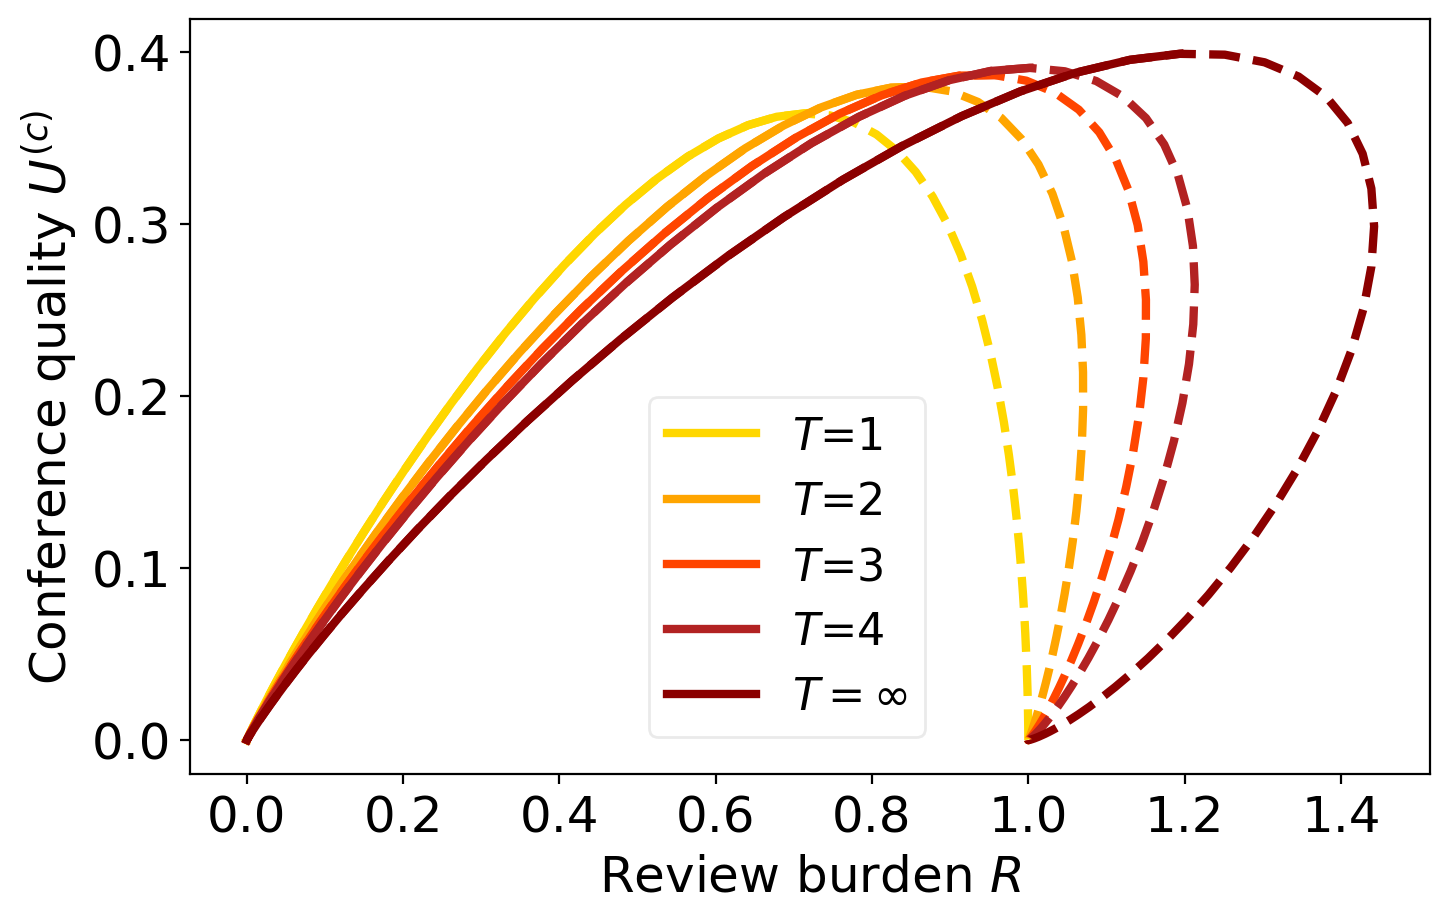

In [212]:
"""
Time-limited fixed threshold
"""

V = 3 # conference value
eta = 0.7 # discount factor
tau_range = np.arange(-12,12,0.1) # the acceptance thresholds
colors = ['gold','orange','orangered','firebrick','darkred']

sigma = 0.5
def F_R(x): # The cdf of the review noise 
    return norm.cdf(x, 0, sigma)

### Quality distribution
sigma_Q = 1
mu_Q = 0
def f_Q(Q):
    return norm.pdf(Q, mu_Q, sigma_Q)

plt.figure(figsize=(8,5), dpi= 200)
for t,T in enumerate([1,2,3,4]):
    U_c = []
    R = []
    for tau in Theta:
        f = lambda x: F_R(x) - (V-1)/(V-eta)
        gap = fsolve(f, 0)[0]
        theta = tau - gap
        def n_round_T(Q):
            # Given a paper quality q, return the expected number of rounds the paper is submitted until accepted
            return f_Q(Q)/(1-F_R(tau - Q))*(1-np.power(F_R(tau - Q), T))
        result = integrate.quad(lambda x: n_round_T(x), theta, np.infty)[0]
        R.append(result)
        result = integrate.quad(lambda x: x*f_Q(x)*(1-np.power(F_R(tau - x), T)), theta, np.infty)[0]
        U_c.append(result)
    U_c = np.array(U_c)
    R = np.array(R)
    U_po, R_po,index = Pareto_optimal(U_c, R)
    plt.plot(R_po, U_po, label = r'$T$='+str(T), color = colors[t], linewidth = 3)
    plt.plot(np.array(R), np.array(U_c), linestyle = '--', color = colors[t], linewidth = 3)

# T = infty
U_c = []
R = []
for tau in Theta:
    f = lambda x: F_R(x) - (V-1)/(V-eta)
    gap = fsolve(f, 0)[0]
    theta = tau - gap
    def n_round(Q):
        # Given a paper quality q, return the expected number of rounds the paper is submitted until accepted
        return f_Q(Q)/(1-F_R(tau - Q))
    result = integrate.quad(lambda x: n_round(x), theta, np.infty)[0]
    R.append(result)
    result = integrate.quad(lambda x: x*f_Q(x), theta, np.infty)[0]
    U_c.append(result)
U_c = np.array(U_c)
R = np.array(R)
U_po, R_po,index = Pareto_optimal(U_c, R)
plt.plot(R_po, U_po, label = r'$T=\infty$', color = colors[-1], linewidth = 3)
plt.plot(np.array(R), np.array(U_c), linestyle = '--', color = colors[-1], linewidth = 3)

plt.legend(fontsize=16, loc = (0.37,0.05),framealpha = 0.4)
plt.xlabel(r'Review burden $R$', fontsize=18)
plt.ylabel(r'Conference quality $U^{(c)}$', fontsize=18)
plt.tick_params(labelsize=18)